## Q5. (Arithmetic Coding)

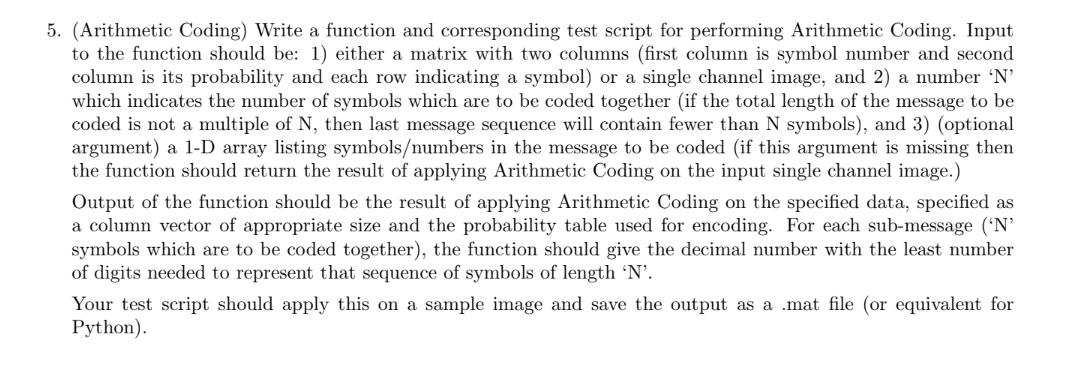

#### **Importing Libraries**

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# For reading and writing images
import cv2

#### **Defining Arithmetic Coding Function**

In [6]:
# Function to perform Arithmetic Coding
def ArithmeticCoding(N, single_channel_image=None, message = None, prob_matrix=None):
    
    if prob_matrix is None and single_channel_image is None:
        print("Please provide either probability matrix or single channel image")
        return
    
    if prob_matrix is None:
        
        # We have single channel image and using it to create probability matrix
        prob_matrix = np.zeros((256,2))

        # Creating probability matrix
        for i in range(256):
            prob_matrix[i][0] = i

        # Calculating probability of each symbol
        for i in range(single_channel_image.shape[0]):
            for j in range(single_channel_image.shape[1]):
                prob_matrix[int(single_channel_image[i][j])][1] += 1

        # Normalizing probability
        prob_matrix[:,1] = prob_matrix[:,1]/(single_channel_image.shape[0]*single_channel_image.shape[1])
        
        # Converting to list
        prob_matrix = prob_matrix.tolist()
    
    # Now we have probability matrix
    
    # Checking if message is provided
    if message is None:
        # Encode single channel image
        message = single_channel_image.flatten()
        # List
        message = message.tolist()
    
    # Now we have message
    # Let's start encoding in chunks of N
    encoded_message = []
    
    # Cumulative probability
    cum_prob_matrix = [[0 for i in range(2)] for j in range(len(prob_matrix))]

    for i in range(len(prob_matrix)):
        cum_prob_matrix[i][0] = prob_matrix[i][0]
        if i == 0:
            cum_prob_matrix[i][1] = prob_matrix[i][1]
        else:
            cum_prob_matrix[i][1] = cum_prob_matrix[i-1][1] + prob_matrix[i][1]
    
    
    for i in range(0, len(message), N):
        
        curr_block = None
        if i+N > len(message):
            curr_block = message[i:]
        else:
            curr_block = message[i:i+N]
            
        curr_min = 0
        curr_max = 1
            
        # print("Encoding Block:", curr_block)
        
        # Calculating range
        for j in range(len(curr_block)):
            
            # Finding cum_prob of symbol in probability matrix
            cum_prob = None
            for k in range(len(prob_matrix)):
                if prob_matrix[k][0] == curr_block[j]:
                    cum_prob = cum_prob_matrix[k][1]
                    break
            
            cum_prob_prev = 0
            if curr_block[j] != cum_prob_matrix[0][0]:
                for k in range(len(prob_matrix)):
                    if prob_matrix[k][0] == curr_block[j]:
                        cum_prob_prev = cum_prob_matrix[k][1] - prob_matrix[k][1]
                        break
            
            # print("Selected Character:", curr_block[j])
            # print("Current Range:", curr_min, curr_max)
            # print("Cumulative Probability:", cum_prob_prev, cum_prob)
            
            # Calculating range
            curr_min_new = curr_min + (curr_max - curr_min)*cum_prob_prev
            curr_max_new = curr_min + (curr_max - curr_min)*cum_prob
            
            curr_min = curr_min_new
            curr_max = curr_max_new
            
            # print("New Range:", curr_min, curr_max)
            
        # Append the Range
        encoded_message.append((curr_min, curr_max))
        
    return encoded_message, prob_matrix, N, len(message)

#### **Function to Find Number with Min Decimal Digits in a given range**

**Problem**:

$2$ numbers $n_1$ and $n_2$ are given. We need to find the number $n$ such that $n_1 \leq n \leq n_2$ and $n$ has minimum number of digits after decimal point.

**Algorithm / Solution**:

We know that $n_1 = 0.a_1a_2a_3...a_n$ and $n_2 = 0.b_1b_2b_3...b_k$

Now, let there exist a common prefix in $a's$ and $b's$. (Common Prefix can also be empty)

Then, $n_1 = 0.a_1a_2a_3...a_n$ and $n_2 = 0.a_1a_2a_3...a_ic_1c_2c_3...c_m$. ($i \geq 0$)

We know that the number with minimum number of decimal digits will have the prefix $0.a_1a_2a_3...a_i$

So first we take it out and consider the remaining parts $a_{i+1}...a_n$ and $c_1c_2c_3...c_m$

There can be following cases:

**1.)** $m > 1$ i.e. remaiining part of $n_2$ contains atleast $2$ digits. So, we can take $0.a_1a_2a_3...a_ic_1$ as the number with minimum number of digits after decimal point.

Example: $n_1 = 0.123456$ and $n_2 = 0.12345789$. 

Here, common prefix is $0.12345$.

Remaining part of $n_1$ is $6$ and remaining part of $n_2$ is $789$.

We see more than $1$ digits in remaining part of $n_2$.

Hence, take $0.123457$ as the number with minimum number of decimal digits.

**2.)** $m = 1$ i.e. remaiining part of $n_2$ contains $1$ digit.

Now we focus on the remaining part of $n_1$.

Remaining part of $n_1$ is $a_{i+1}...a_n$

Now, we know that $n_2 \geq n_1$.

Hence, $c_1 \geq a_{i+1}$

Hence, $a_{i+1} \leq 8$

**2.a)**

If $i+1 = n$ i.e. $a_{i+1}$ is the last digit of $n_1$.

Then, we can take $0.a_1a_2a_3...a_{i+1}$ as the number with minimum number of digits after decimal point.

**2.b)**

Otherwise, let remaining part of $n_1$ be $a_{i+1} \hspace{1mm} 99999..(t-times \hspace{1mm} 9) \hspace{1mm} a_{i+t+2}...a_{n}$ ($t \geq 0$)

if $i + t + 2 \leq n$ i.e. Last digit is not $9$,

Then the answer is $0.a_1a_2a_3...a_{i+1} \hspace{1mm} 99999 \hspace{0.5mm} ._{(t+1-times)}$

Else, the answer is $0.a_1a_2a_3...a_{i+1} \hspace{1mm} 99999 \hspace{0.5mm} ._{(t-times)}$

In [41]:
def find_num_with_min_dec_digits(range):

    # Finding number of digits after decimal
    # Range is a tuple of 2 elements
    n1 = str(range[0])
    n2 = str(range[1])
    
    # After Decimal Point
    n1 = n1.split(".")[1]
    n2 = n2.split(".")[1]
    
    # Find Longest Common Prefix
    i = 0
    while i < len(n1) and i < len(n2):
        if n1[i] != n2[i]:
            break
        i += 1

    # Now after ith index not same
    # 399999 and 422222
    if i < len(n2)-1:
        return float("0." + n2[:i+1])
    
    # 39999 and 5
    if(int(n2[i]) > int(n1[i]) + 1):
        return float("0." + n2[:i] + str(int(n1[i]) + 1))

    # 39999923 and 4
    # Now last i is last index of n2    
    mismatch = 0
    while(i < len(n1)):
        if(n1[i] != '9'):
            if mismatch == 1:
                break
            mismatch += 1
            i += 1
        else:
            i += 1

    
    if i == len(n1):
        return float("0." + n1)
    
    
    return float("0." + n1[:i] + "9")

In [76]:
# Testing find_num_with_min_dec_digits

print("Number with minimum decimal digits in the range (0.399999, 0.422222):", find_num_with_min_dec_digits((0.399999, 0.422222)))

print("Number with minimum decimal digits in the range (0.399999, 0.4):", find_num_with_min_dec_digits((0.399999, 0.4)))

print("Number with minimum decimal digits in the range (0.39999, 0.5):", find_num_with_min_dec_digits((0.39999, 0.5)))

print("Number with minimum decimal digits in the range (0.39999923, 0.4):", find_num_with_min_dec_digits((0.39999923, 0.4)))

print("Number with minimum decimal digits in the range (0.24123123, 0.3):", find_num_with_min_dec_digits((0.24123123, 0.3)))

print("Number with minimum decimal digits in the range (0.24123123, 0.25123124):", find_num_with_min_dec_digits((0.24123123, 0.25123124)))

print("Number with minimum decimal digits in the range (0.88, 0.89):", find_num_with_min_dec_digits((0.88, 0.89)))

Number with minimum decimal digits in the range (0.399999, 0.422222): 0.4
Number with minimum decimal digits in the range (0.399999, 0.4): 0.399999
Number with minimum decimal digits in the range (0.39999, 0.5): 0.4
Number with minimum decimal digits in the range (0.39999923, 0.4): 0.3999999
Number with minimum decimal digits in the range (0.24123123, 0.3): 0.29
Number with minimum decimal digits in the range (0.24123123, 0.25123124): 0.25
Number with minimum decimal digits in the range (0.88, 0.89): 0.88


#### **Utility Functions**

**Find optimal numbers for each range in the encoded message**

In [43]:
def find_opt(encoded_message):
    final_message = []
    for i in range(len(encoded_message)):
        final_message.append(find_num_with_min_dec_digits(encoded_message[i]))
    return final_message

**Plot Message**

In [44]:
def plot_message(message, isScatter=True, isMarking=True, fig_size=(30,20)):

    # Size of the plot
    plt.figure(figsize=fig_size)

    plt.plot(message)

    if isScatter:
        plt.scatter(range(len(message)), message)
    if isMarking:
        # Marking the points with values
        for i in range(len(message)):
            plt.annotate(str(message[i]), (i, message[i]))
            
    plt.xlabel("Message Chunk")
    plt.ylabel("Message with Optimal Number of Decimal Digits")
    plt.show()

## **Examples** (For Testing)

Parameters: (Manual Testing)

**N** - Integer that represents the number of symbols that must be encoded in a chunk

**single_channel_image** - NumPy Array of shape (H, W) that represents the image to be encoded or variable storing the Grayscale image to be encoded (Default None)

**message** = Message to be encoded (list of characters) (Default None)

**prob_matrix** - Probability Matrix (Normalized histogram of the image) (Map of characters and probability values in format specified in example) (Default None)

### **Example 1: Single Channel Image as a NumPy Array**

### **Example 2: Probability Matrix with Message**

### **Example 3: Probability Matrix with Message**

### **Example 4: Single Channel Image as a Grayscale Image**

**Example with Single Channel Image**

$$N = 5$$

**single_channel_image**

$$ = \begin{bmatrix} 1 & 2 & 3 & 4 \\ 5 & 6 & 7 & 8 \\ 9 & 10 & 11 & 12 \\ 13 & 14 & 15 & 16 \end{bmatrix} $$

(Change the above parameters and run the code for the output as you wish)

In [45]:
# Test the Function
encoded, prob_matrix, N, length = ArithmeticCoding(5, single_channel_image = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]))

In [46]:
encoded

[(0.004444122314453125, 0.004445075988769531),
 (0.33777713775634766, 0.33777809143066406),
 (0.6711101531982422, 0.6711111068725586),
 (0.9375, 1.0)]

In [47]:
np.array(prob_matrix).shape

(256, 2)

In [48]:
N, length

(5, 16)

In [49]:
# Getting the Optimal Number in each Range and Plotting the Final Message
final_message =  find_opt(encoded)

In [50]:
final_message

[0.004445, 0.337778, 0.671111, 0.939]

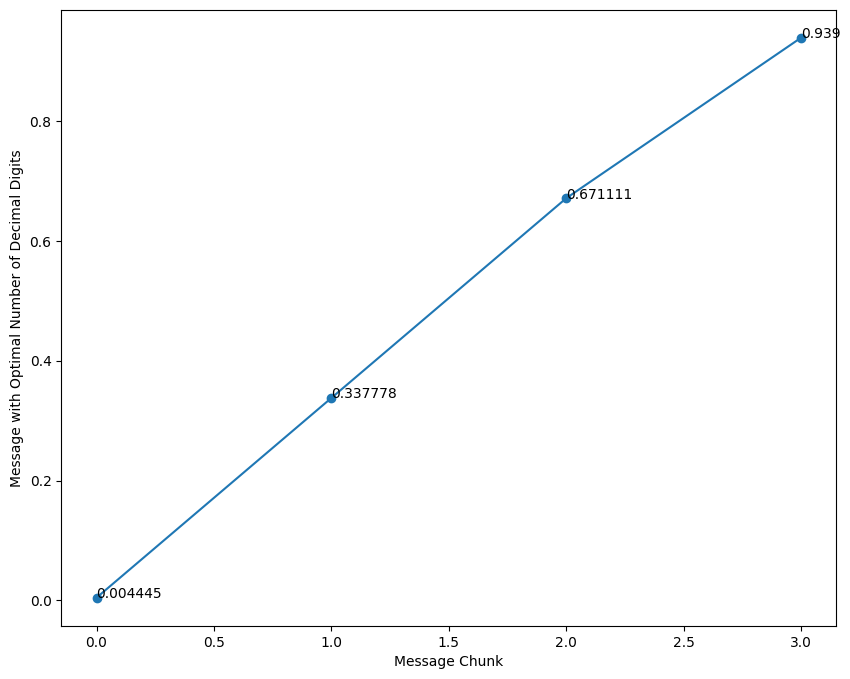

In [51]:
plot_message(final_message, fig_size=(10, 8))

**Example with Probability Matrix**

$$N = 4$$

**prob_matrix**

$$ = \begin{bmatrix} A & 0.2 \\ B & 0.2 \\ C & 0.4 \\ D & 0.2 \end{bmatrix} $$

**message** = BACD

(Change the above parameters and run the code for the output as you wish)

In [52]:
# Another Example
prob_matrix = [['A',0.2],['B',0.2],['C',0.4],['D',0.2]]
message = ['B','A','C','D']

encoded, prob_matrix, N, length = ArithmeticCoding(4, prob_matrix = prob_matrix, message = message)

In [53]:
encoded

[(0.2288, 0.232)]

In [54]:
prob_matrix

[['A', 0.2], ['B', 0.2], ['C', 0.4], ['D', 0.2]]

In [55]:
N, length

(4, 4)

In [56]:
# Getting the Optimal Number in each Range and Plotting the Final Message
final_message =  find_opt(encoded)

In [57]:
final_message

[0.23]

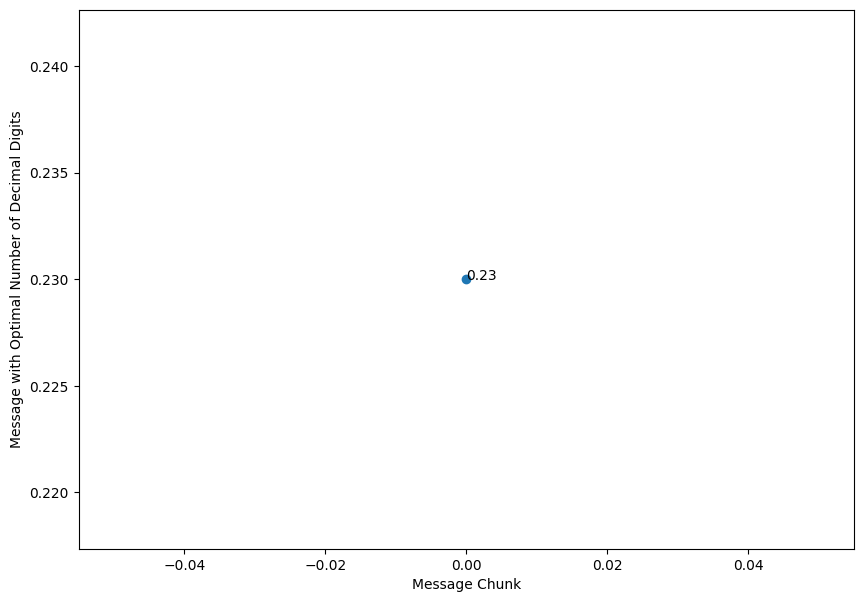

In [58]:
plot_message(final_message, fig_size=(10,7))

**Exam Question**

$$N = 4$$

**prob_matrix**

$$ = \begin{bmatrix} A & 0.2 \\ B & 0.2 \\ C & 0.4 \\ D & 0.2 \end{bmatrix} $$

**message** = BABDBACD

(Change the above parameters and run the code for the output as you wish)


In [59]:
prob_matrix = [['A',0.2],['B',0.2],['C',0.4],['D',0.2]]
message = ['B','A','B','D', 'B', 'A', 'C', 'D']

encoded, prob_matrix, N, length = ArithmeticCoding(4, prob_matrix = prob_matrix, message = message)

In [60]:
encoded

[(0.21440000000000003, 0.21600000000000003), (0.2288, 0.232)]

In [61]:
np.array(prob_matrix).shape

(4, 2)

In [62]:
N, length

(4, 8)

In [29]:
# Getting the Optimal Number in each Range and Plotting the Final Message
final_message =  find_opt(encoded)

In [30]:
final_message

[0.216, 0.23]

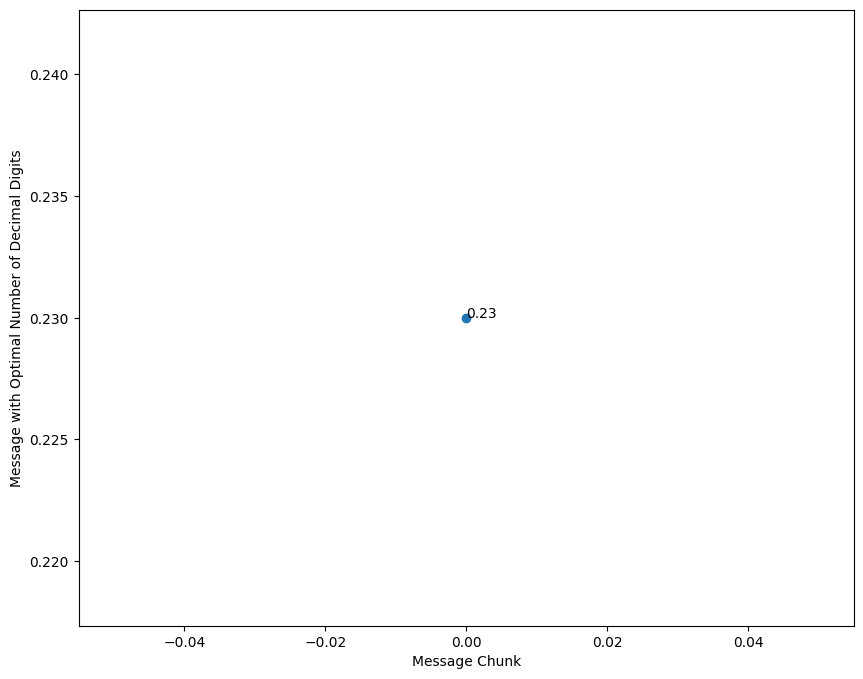

In [63]:
plot_message(final_message, fig_size=(10,8))

**Real Gray Scale Image**

$\Rightarrow$ Encode Images produced in Question 3 and 4

$$N = 4$$

**single_channel_image** = Q3.png / Q4.png

(Change the above parameters and run the code for the output as you wish)

In [64]:
# Read Q3.png and Q4.png
import cv2

# Read Q3.png as Grayscale
Q3 = cv2.imread("Q3.png", cv2.IMREAD_GRAYSCALE)

# Read Q4.png as Grayscale
Q4 = cv2.imread("Q4.png", cv2.IMREAD_GRAYSCALE)

In [65]:
Q3.shape, Q4.shape

((1044, 1044), (1064, 1064))

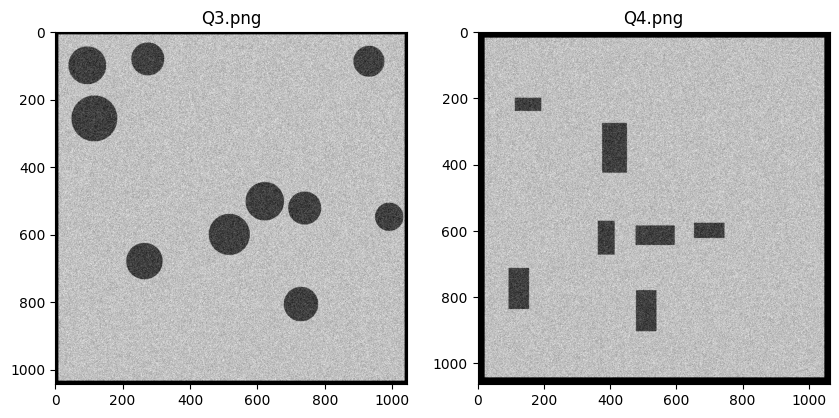

In [66]:
# Show Images In a Single Plot
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(Q3, cmap="gray")
ax[0].set_title("Q3.png")

ax[1].imshow(Q4, cmap="gray")
ax[1].set_title("Q4.png")

plt.show()

In [67]:
# Let's Encode Q3.png
encoded_Q3, prob_matrix_Q3, N_Q3, length_Q3 = ArithmeticCoding(4, single_channel_image = Q3)

# Let's Encode Q4.png
encoded_Q4, prob_matrix_Q4, N_Q4, length_Q4 = ArithmeticCoding(4, single_channel_image = Q4)

In [68]:
# Let's see the encoded messages
np.array(encoded_Q3).shape, np.array(encoded_Q4).shape

((272484, 2), (283024, 2))

In [69]:
# Probability Matrix for Q3.png and Q4.png
np.array(prob_matrix_Q3).shape, np.array(prob_matrix_Q4).shape

((256, 2), (256, 2))

In [70]:
N_Q3, length_Q3

(4, 1089936)

In [71]:
N_Q4, length_Q4

(4, 1132096)

In [72]:
# Getting the Optimal Number in each Range and Plotting the Final Message
final_message_Q3 =  find_opt(encoded_Q3)
final_message_Q4 =  find_opt(encoded_Q4)

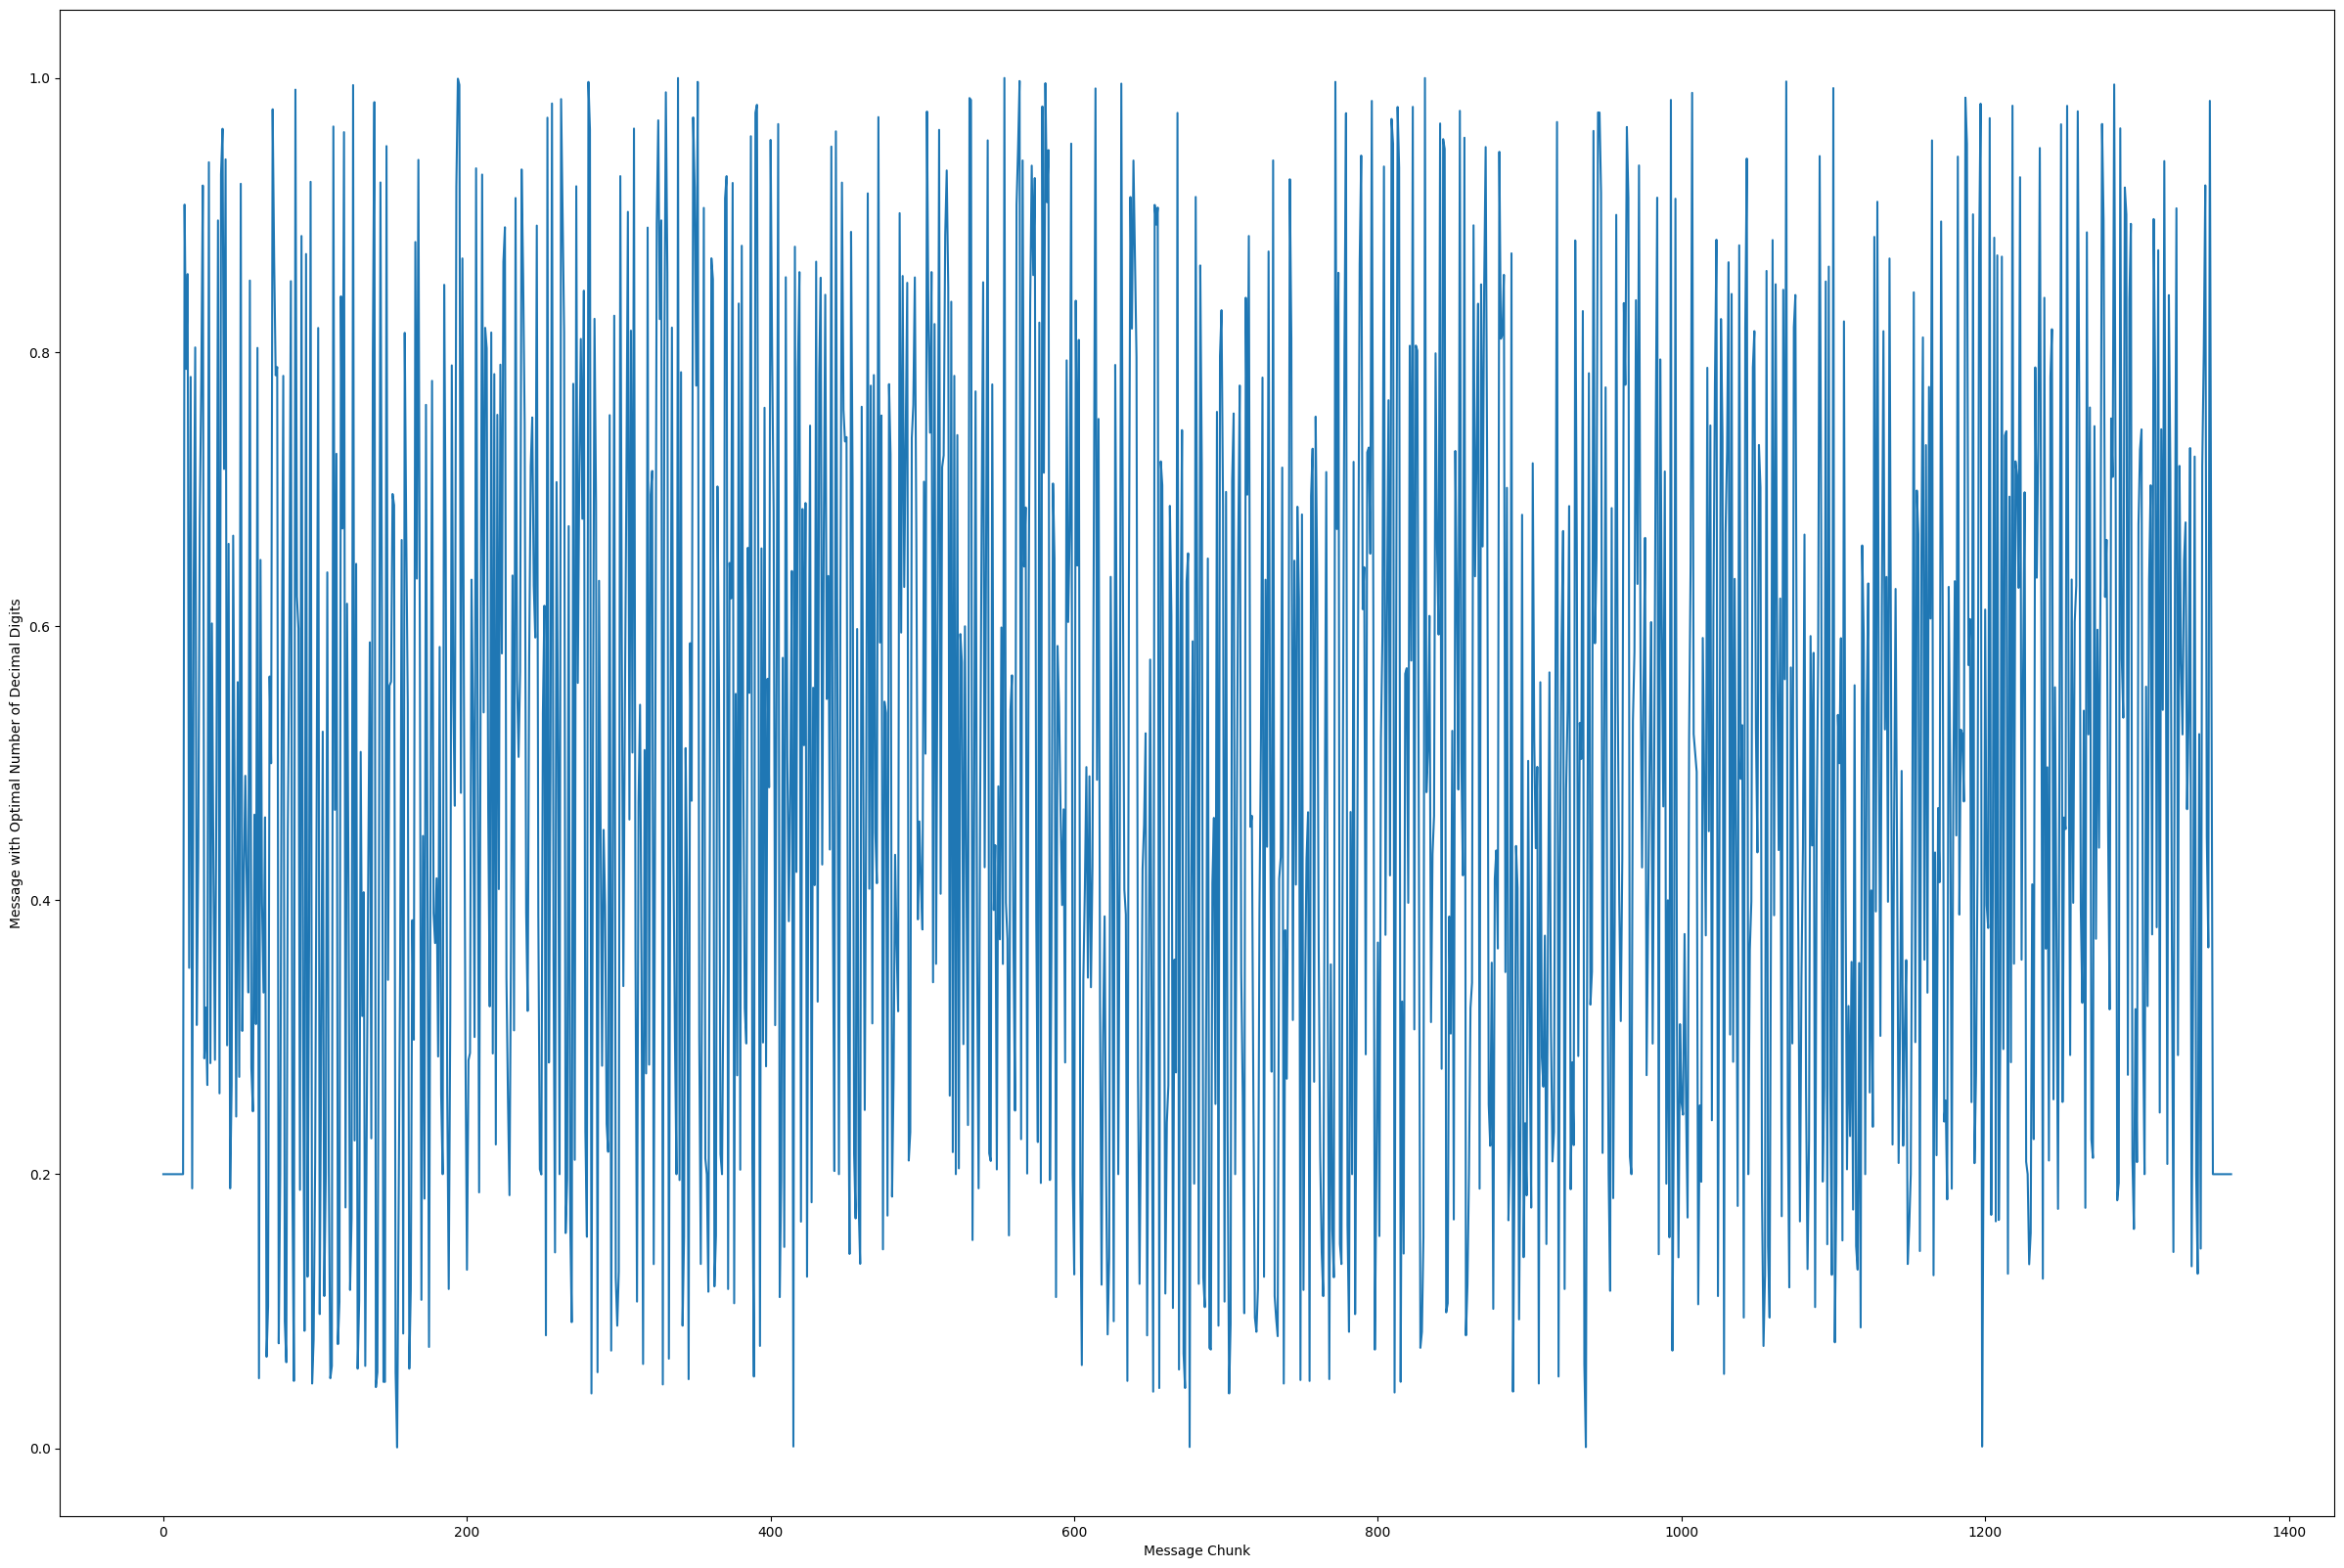

In [73]:
# Plotting the Final Message (At Some intervals otherwise it will be too dense)
plot_message(final_message_Q3[0:-1:200], isScatter=False, isMarking=False)

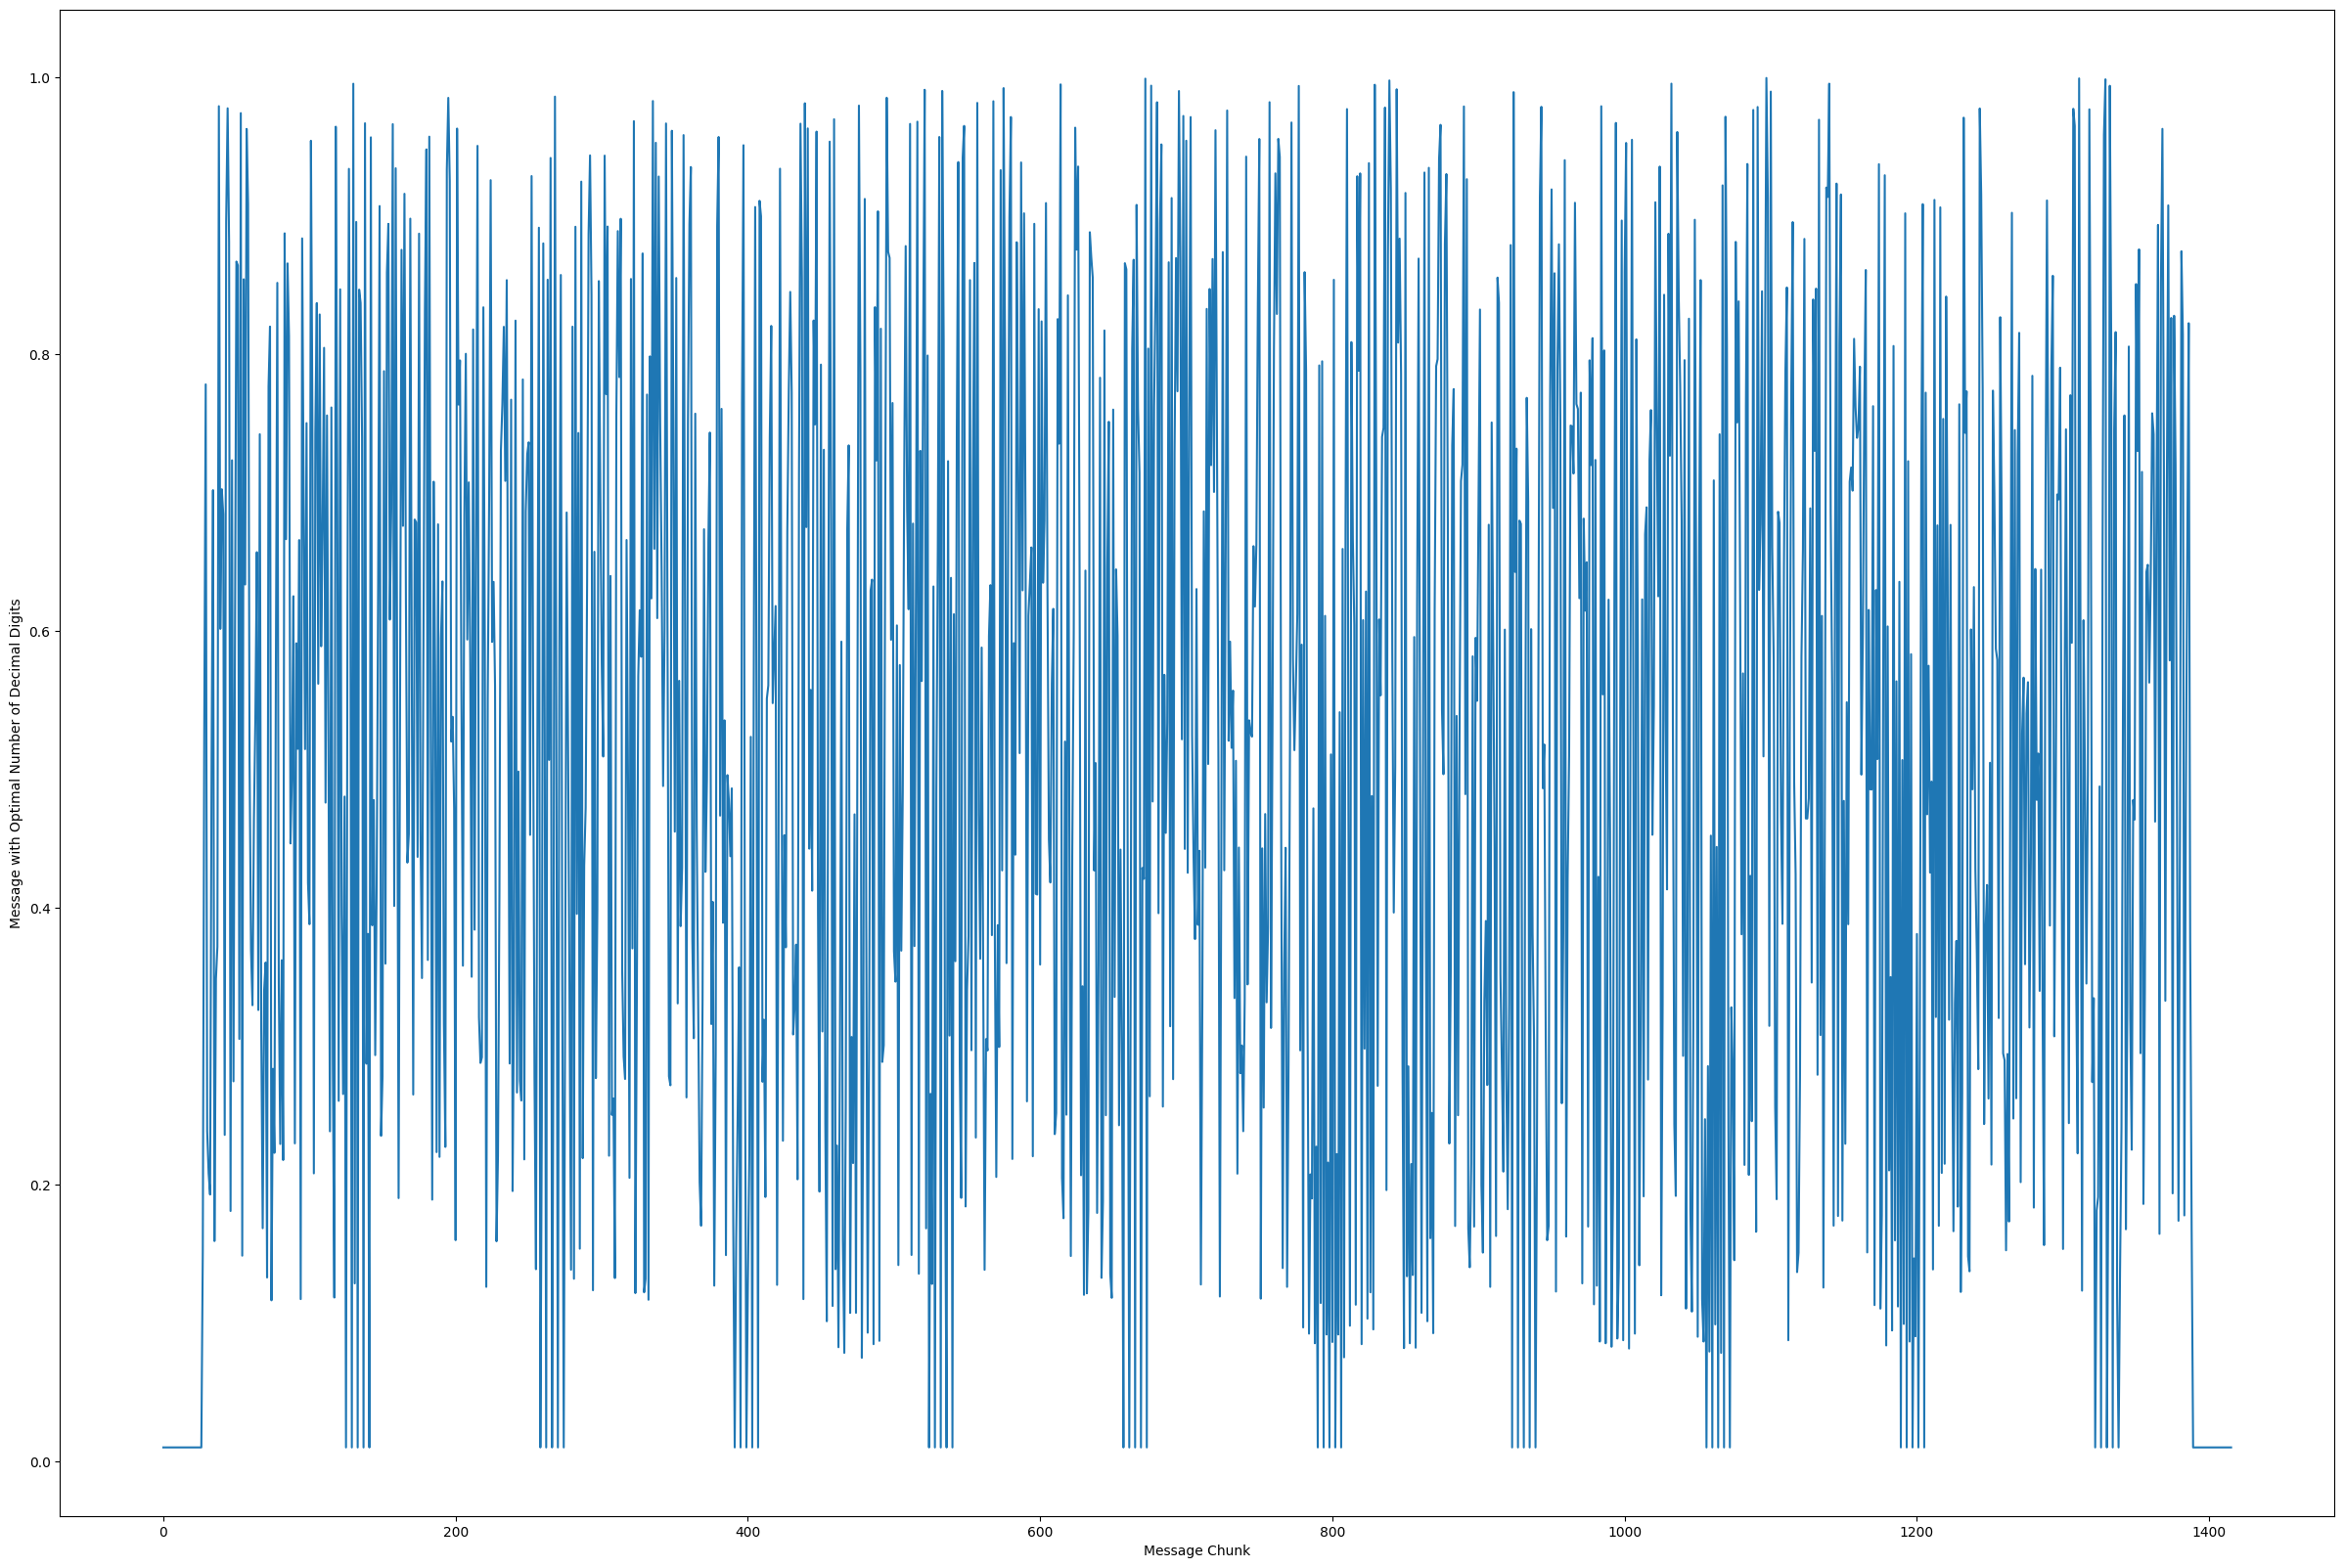

In [74]:
# Plotting the Final Message (At Some intervals otherwise it will be too dense)
plot_message(final_message_Q4[0:-1:200], isScatter=False, isMarking=False)